In [69]:
%load_ext autoreload
%autoreload 2
import notebook_path

import pickle
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
from settings import CORRELATIONS
from pathlib import Path

# NOTE 'm_syllable_3khz' hasnt been done yet (unnececary?)
targets = ['upsweep_500hz', 'fast_trill_6khz', 'nr_syllable_3khz', 'triangle_3khz']
dataframes = {}

for name in targets:
    with open(Path(CORRELATIONS) / name / 'all_7depl.pkl', 'rb') as f:
        df = pickle.load(f)
        print(name, len(df))
        dataframes[name] = df

upsweep_500hz 120923
fast_trill_6khz 192055
nr_syllable_3khz 3084
triangle_3khz 1100905


previous n# correlations:  120923
filtered n# correlations:  448
13 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_063000.wav


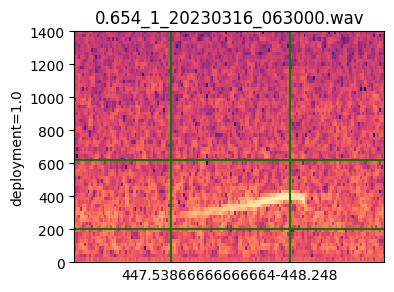

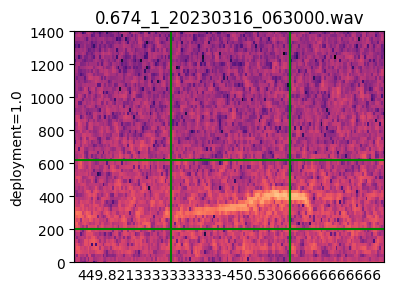

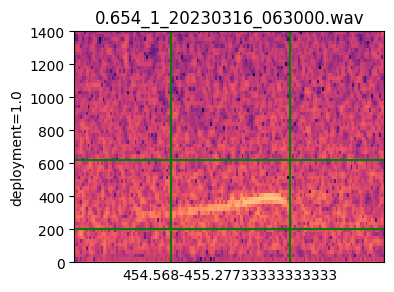

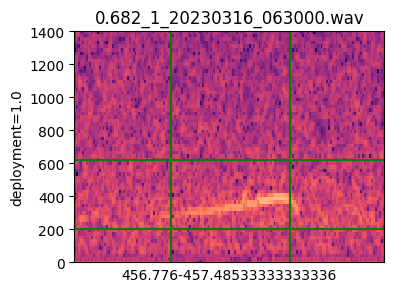

file cap reached


In [77]:
from plotting import view_spectrogram
from correlate import filter_correlations, produce_images

df, _ = dataframes['upsweep_500hz']
df_filtered = filter_correlations(df, thresh=0.65, overlap_cutoff=0.5)
produce_images(df_filtered, None, figsize=(4, 3), 
               file_cap=5,
               y_lim=1_400, 
               display_figures=True, 
               save_figures=False)

dataframes['upsweep_500hz'] = (df, df_filtered)

previous n# correlations:  192055
filtered n# correlations:  433
1 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230317_070000.wav


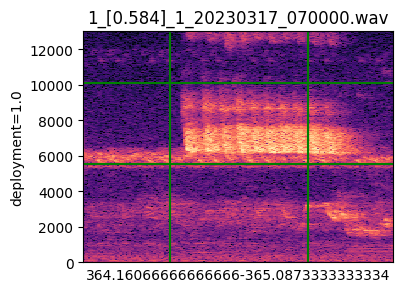

1 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230319_063000.wav


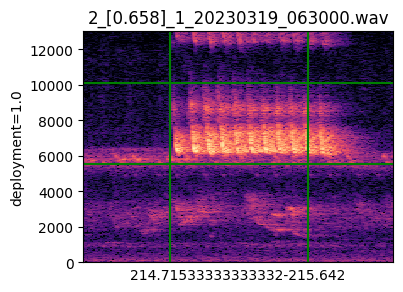

2 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230320_063000.wav


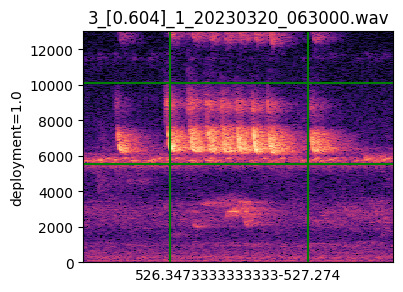

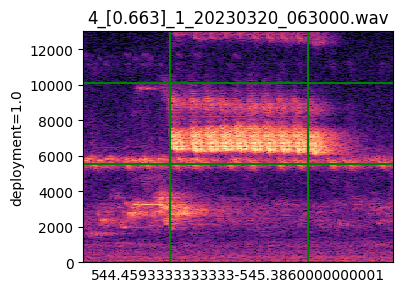

1 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230320_073000.wav
file cap reached


In [101]:
df, _ = dataframes['fast_trill_6khz']
df_filtered = filter_correlations(df, thresh=0.58, overlap_cutoff=0.5)

# realign
df_filtered["min_t"] += 0.15
df_filtered["max_t"] -= 0.15

produce_images(df_filtered, None, figsize=(4, 3), 
               file_cap=5,
               y_lim=13_000, 
               display_figures=True, 
               save_figures=False)


dataframes['fast_trill_6khz'] = (df, df_filtered)

previous n# correlations:  3084
filtered n# correlations:  733
6 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230317_163000.wav


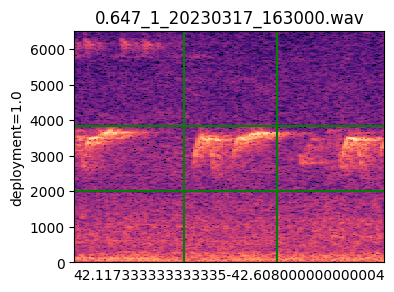

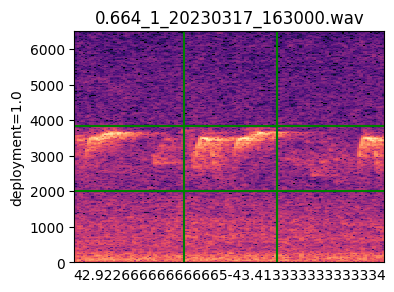

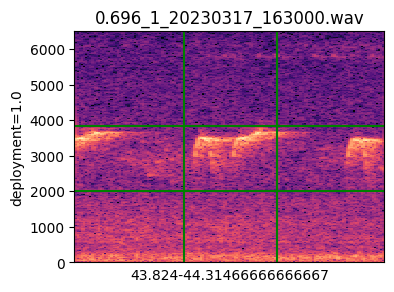

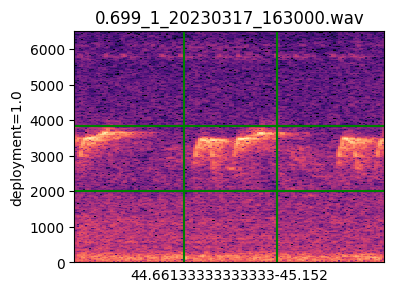

file cap reached


In [78]:
df, _ = dataframes['nr_syllable_3khz']
df_filtered = filter_correlations(df, thresh=0.6, overlap_cutoff=0.5)
produce_images(df_filtered, None, figsize=(4, 3), 
               file_cap=5,
               y_lim=6_500, 
               display_figures=True, 
               save_figures=False)

dataframes['nr_syllable_3khz'] = (df, df_filtered)

previous n# correlations:  1100905
filtered n# correlations:  1485
14 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_063000.wav


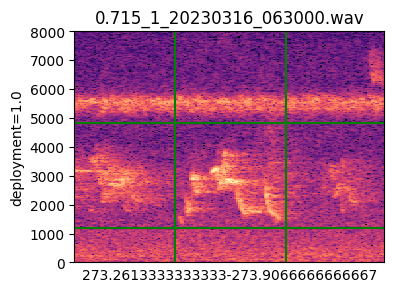

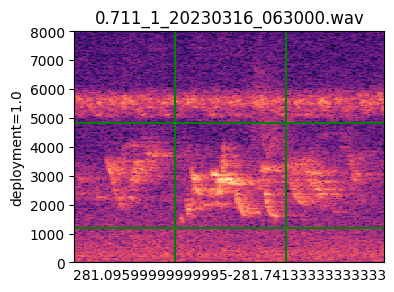

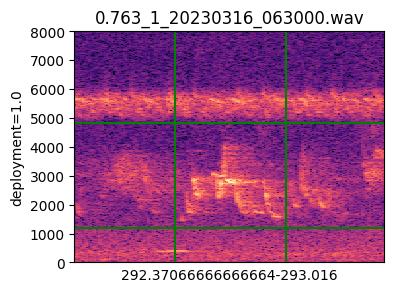

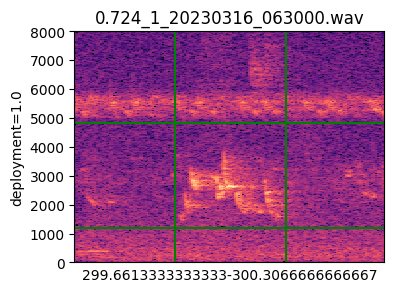

file cap reached


In [82]:
df, _ = dataframes['triangle_3khz']
df_filtered = filter_correlations(df, thresh=0.65, overlap_cutoff=0.5)

produce_images(df_filtered, None, figsize=(4, 3), 
               file_cap=5,
               y_lim=8_000, 
               display_figures=True, 
               save_figures=False)

dataframes['triangle_3khz'] = (df, df_filtered)

In [103]:
from correlate import produce_images, filter_correlations
from pathlib import Path
from settings import *

for name in targets:
    _, df_filt = dataframes[name]
    df_filt = pd.concat([df_filt], ignore_index=True) # fix index
    print(name, len(df_filt))
    with open(Path(CORRELATIONS) / name / 'all_7depl_filtered.pkl', "wb") as f:
        pickle.dump(df_filt, f)    

upsweep_500hz 448
fast_trill_6khz 433
nr_syllable_3khz 733
triangle_3khz 1485


In [104]:
targets = ['upsweep_500hz', 'fast_trill_6khz', 'nr_syllable_3khz', 'triangle_3khz']
y_lims = [1_300,            13_000,             6_500,              8_000]

for name, y in zip(targets, y_lims):
    image_folder = Path("../untracked/") / (name + '_images')
    Path(image_folder).mkdir(exist_ok=True)
    _, df_filt = dataframes[name]
    df_filt = pd.concat([df_filt], ignore_index=True)
    
    produce_images(df_filt, 
                   image_folder=image_folder, 
                y_lim=y, 
                display_figures=False, 
                save_figures=True)
    
    

13 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230316_063000.wav
42 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230317_063000.wav
9 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230317_070000.wav
1 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230318_073000.wav
2 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230319_170000.wav
1 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230319_173000.wav
2 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230322_070000.wav
2 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230322_170000.wav
1 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230323_053000.wav
54 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230330_180000.wav
6 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230331_060000.wav
33 from:  E:\acoustic-AL-dataset\site01\deployment_001\Data\1_20230331_073000.wav
1 from:  E:\acoustic-AL-